
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [ ]:
pip install keras

In [1]:
#
# Import relevant Libraries
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.15.0


In [4]:

# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.

from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

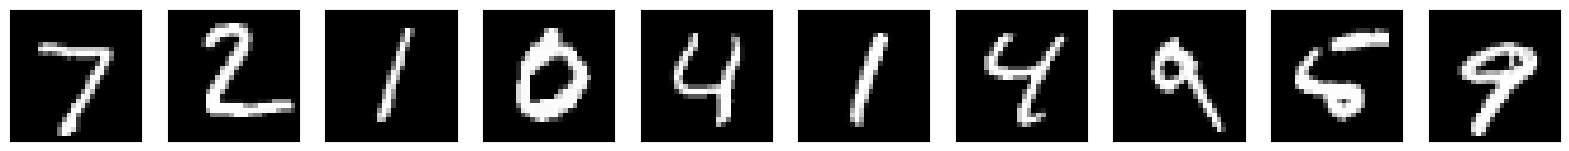

In [5]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [6]:
# Normalize train data - Divide by 255
# Normalize test data - Divide by 255

x_train = x_train/255
x_test = x_test/255

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [14]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Reshape

In [11]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#
# Add as many hidden layers in the encoder network of your choise
#
#


# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#


encoder.add(Dense(300, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

In [12]:
# print the encoder model

print(encoder.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 200)               60200     
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 25)                1275      
                                                                 
Total params: 322125 (1.23 MB)
Trainable params: 32212

In [17]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
#

decoder.add(Dense(300, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(50, activation = 'relu'))
decoder.add(Dense(25, activation = 'relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [18]:
# print the decoder model

print(decoder.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 50)                1300      
                                                                 
 dense_22 (Dense)            (None, 300)               15300     
                                                                 
 dense_23 (Dense)            (None, 200)               60200     
                                                                 
 dense_24 (Dense)            (None, 100)               20100     
                                                                 
 dense_25 (Dense)            (None, 50)                5050      
                                                                 
 dense_26 (Dense)            (None, 25)                1275      
                                                                 
 dense_27 (Dense)            (None, 784)              

In [19]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [21]:
# print the autoencoder model

print(autoencoder.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 25)                416550    
                                                                 
 sequential_7 (Sequential)   (None, 28, 28)            123609    
                                                                 
Total params: 540159 (2.06 MB)
Trainable params: 540159 (2.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [22]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.

autoencoder.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [46]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.

history = autoencoder.fit(x_train, x_train, epochs = 10, batch_size = 32, validation_data = (x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1497 - accuracy: 0.2082 - val_loss: 0.1484 - val_accuracy: 0.2075
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1485 - accuracy: 0.2108 - val_loss: 0.1474 - val_accuracy: 0.2110
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1477 - accuracy: 0.2128 - val_loss: 0.1478 - val_accuracy: 0.2111
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1469 - accuracy: 0.2147 - val_loss: 0.1460 - val_accuracy: 0.2151
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1461 - accuracy: 0.2164 - val_loss: 0.1451 - val_accuracy: 0.2191
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1453 - accuracy: 0.2173 - val_loss: 0.1441 - val_accuracy: 0.2199
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1443 - accuracy: 0.2182 - val_loss: 0.1434 - val_accuracy:

313/313 [==============================] - 1s 3ms/step


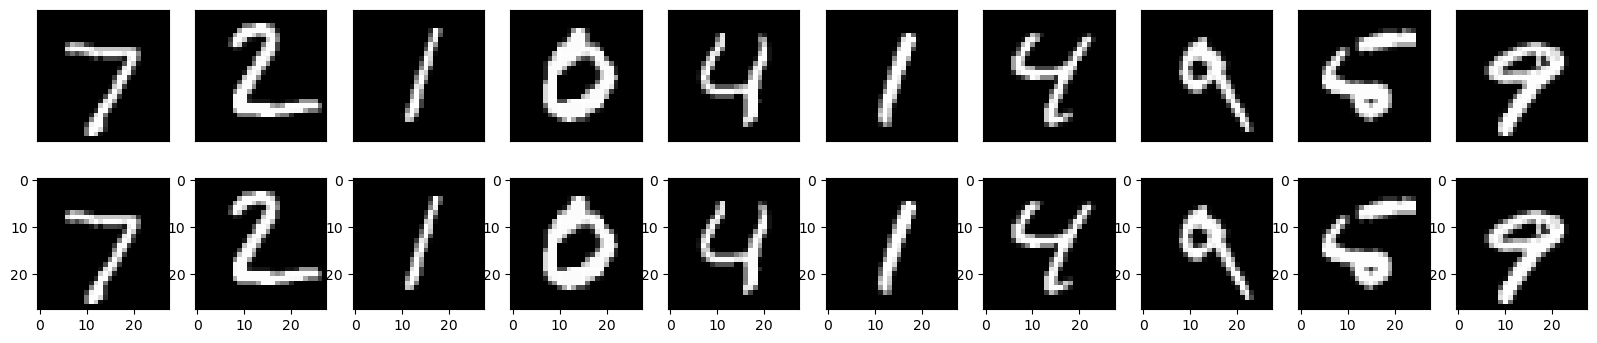

In [47]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    #
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    
plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [35]:
from tensorflow.keras.layers import GaussianNoise

In [36]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

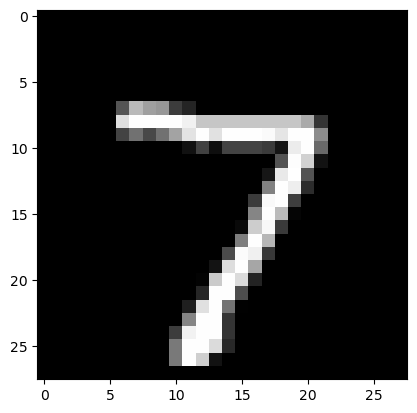

In [37]:
plt.imshow(x_test[0])

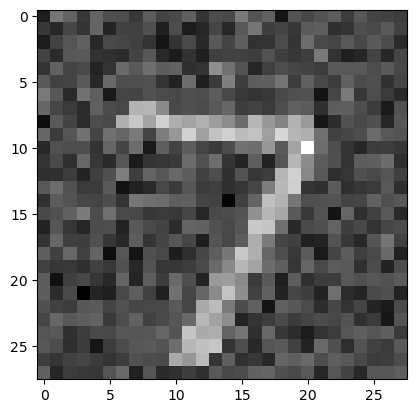

In [38]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [39]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
#

encoder.add(Dense(300, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))


In [40]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
#

decoder.add(Dense(300, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(50, activation = 'relu'))
decoder.add(Dense(25, activation = 'relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [41]:
noise_remover = Sequential([encoder, decoder])

In [42]:
# Compile the network as earlier

noise_remover.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [43]:
# Fit the network as earlier.

history = noise_remover.fit(x_train, x_train, epochs = 10, batch_size = 32, validation_data = (x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2226 - accuracy: 0.1260 - val_loss: 0.1778 - val_accuracy: 0.1671
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1698 - accuracy: 0.1766 - val_loss: 0.1591 - val_accuracy: 0.1842
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1547 - accuracy: 0.1954 - val_loss: 0.1451 - val_accuracy: 0.2126
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1433 - accuracy: 0.2097 - val_loss: 0.1356 - val_accuracy: 0.2085
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1379 - accuracy: 0.2158 - val_loss: 0.1314 - val_accuracy: 0.2232
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1327 - accuracy: 0.2226 - val_loss: 0.1260 - val_accuracy: 0.2312
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1282 - accuracy: 0.2285 - val_loss: 0.1228 - val_accuracy:

In [44]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


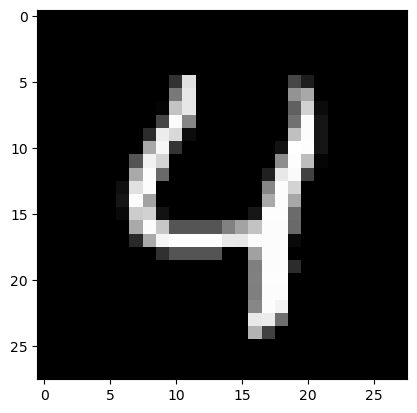

The Noisey Version


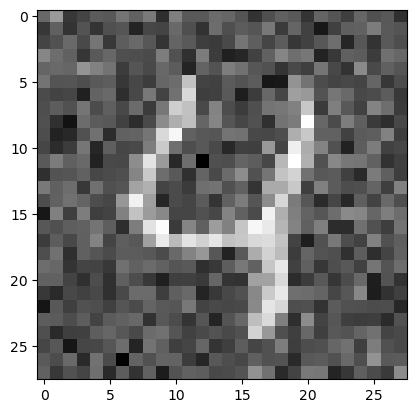

After going through denoiser


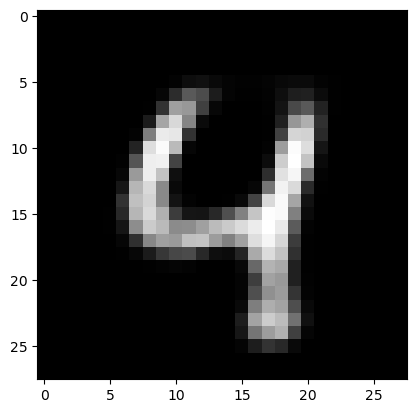

In [45]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.